# Feature Engineering

In [18]:
import numpy as np
import pandas as pd
import regex as re

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [14]:
df = pd.read_csv('indian_properties_cleaned_v1.csv')
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,experion the heartsong,sector 108,1.68,8387.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up area: 1338.29 sq.ft. (124.33 sq.m.)Carpet area: 986.41 sq.ft. (91.64 sq.m.),3,3,3+,"servant room,study room",4.0,East,1 to 5 Year Old,"['Galleria 108 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'The Shikshiyan School', 'Manipal Hospital', 'Indira Gandhi International Airport', 'Vivanta New Delhi, Dwarka', 'SkyJumper Trampoline Park', 'Fun N Food Village']","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '1 Geyser', '7 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1,flat,emaar digihomes,sector 62,2.45,16000.0,1531.0,Built Up area: 1200 (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2,2,study room,7.0,North-East,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy,Sector 48', 'Heritage School', 'Lotus Valley Intl School, Gurgaon', 'Gurugram University', 'Sushant University', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Imperia Mindspace', 'AIPL Business Tower']","['1 Water Purifier', '2 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '1 Geyser', '1 Stove', '3 Light', '4 AC', '2 TV', '1 Modular Kitchen', '3 Chimney', '1 Curtains', '2 Wardrobe', '1 Sofa', '1 Washing Machine', 'No Bed', 'No Microwave']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850 sq.yards (2382.96 sq.m.)Carpet area: 2250 sq.yards (1881.29 sq.m.),8,7,3+,"pooja room,study room,servant room,others",3.0,East,5 to 10 Year Old,"['Huda city centre metro station', 'New Life Church', 'Hanuman Mandir', 'Hdfc bank ATM', 'Standard chartered ATM', 'Hdfc ATM', 'Rbs ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Citi bank ATM', 'Icici ATM', 'Axis bank ATM', 'Hdfc ATM', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Gupta', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Arihant Hospital', 'Paras Hospital Gurgaon', 'Sitaram Bhartia', 'Centre For Sight Gurgaon Sector 29', 'Guardian Pharmacy', 'Chikitsa', 'Gardian Pharmacy', 'City Medical', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Naveidyam', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Starbucks', 'Blue Tokai Coffee Roasters', 'Dighent cafe', 'Pizza Hut', 'Fat', 'Nowhere Brewpub and cafe', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['8 Wardrobe', '10 Fan', '1 Exhaust Fan', '10 Geyser', '1 Stove', '30 Light', '1 Modular Kitchen', '4 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 

In [15]:
df.isnull().sum().sum()

2973

# There are 5 columns which seems like having some issue will try to solve those using feature engineering techniques
1) areawithtype
2) additional room
3) ageposession
4) furnish Details
5) features

# 1. areaWithType

### lets start with column AREAWITHTYPE
#### There are 3 types
1) carpet area ---> where the rooms, bathrooms, kitchen is taken place
2) buildup area ---> carpet area + thickness of walls + balcony
3) super buildup area --> buildup area + common garden....

In [16]:
df[['area', 'areaWithType']].head()

,area,areaWithType
0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up area: 1338.29 sq.ft. (124.33 sq.m.)Carpet area: 986.41 sq.ft. (91.64 sq.m.)
1,1531.0,Built Up area: 1200 (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.)
2,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850 sq.yards (2382.96 sq.m.)Carpet area: 2250 sq.yards (1881.29 sq.m.)
3,1836.0,Plot area 204(170.57 sq.m.)
4,1350.0,Plot area 163(136.29 sq.m.)Built Up area: 161 sq.yards (134.62 sq.m.)Carpet area: 150 sq.yards (125.42 sq.m.)


In [20]:
# our task here is to create 3 new columns and convert the values to sq.ft, uisng some functions

# This function extracts the Super built up area
def super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    
    if match:
        return float(match.group(1))
    return None

In [21]:
# This function extracts the Build up area and carpet area

def builtup_carpet_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [22]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed

def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [24]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: builtup_carpet_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: builtup_carpet_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [26]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
281,0.85,house,67.0,Plot area 67(6.22 sq.m.),NaN,NaN,NaN
2020,1.60,flat,1929.0,Super Built up area 1929(179.21 sq.m.)Built Up area: 1548 sq.ft. (143.81 sq.m.)Carpet area: 1300 sq.ft. (120.77 sq.m.),1929.0,1548.0,1300.0
2281,2.00,flat,1700.0,Super Built up area 1700(157.94 sq.m.),1700.0,NaN,NaN
2941,1.50,flat,1750.0,Super Built up area 1750(162.58 sq.m.)Built Up area: 1466 sq.ft. (136.2 sq.m.),1750.0,1466.0,NaN
1853,3.75,flat,2802.0,Super Built up area 2802(260.31 sq.m.),2802.0,NaN,NaN


In [27]:
df.duplicated().sum()

122

In [28]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [29]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,5.50,house,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850 sq.yards (2382.96 sq.m.)Carpet area: 2250 sq.yards (1881.29 sq.m.),NaN,2850.0,2250.0
3,3.90,house,1836.0,Plot area 204(170.57 sq.m.),NaN,NaN,NaN
4,4.25,house,1350.0,Plot area 163(136.29 sq.m.)Built Up area: 161 sq.yards (134.62 sq.m.)Carpet area: 150 sq.yards (125.42 sq.m.),NaN,161.0,150.0
10,1.85,house,60.0,Plot area 60(5.57 sq.m.),NaN,NaN,NaN
15,1.83,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN


In [30]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [37]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,3.90,house,1836.0,Plot area 204(170.57 sq.m.),NaN,NaN,NaN
10,1.85,house,60.0,Plot area 60(5.57 sq.m.),NaN,NaN,NaN
15,1.83,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
18,2.50,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,NaN,NaN
19,10.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,NaN,NaN


In [38]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index


# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [39]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,3.90,house,1836.0,Plot area 204(170.57 sq.m.),NaN,204.00,NaN
10,1.85,house,60.0,Plot area 60(5.57 sq.m.),NaN,60.00,NaN
15,1.83,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
18,2.50,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,1800.00,NaN
19,10.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,402.00,NaN
22,1.35,house,3500.0,Plot area 3500(325.16 sq.m.),NaN,3500.00,NaN
28,3.30,house,1728.0,Plot area 192(160.54 sq.m.),NaN,192.00,NaN
29,6.50,house,4320.0,Plot area 480(401.34 sq.m.),NaN,480.00,NaN
34,13.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
36,5.50,house,300.0,Plot area 300(27.87 sq.m.),NaN,300.00,NaN


In [43]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']
        
        
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,3.90,house,1836.0,Plot area 204(170.57 sq.m.),NaN,1836.00,NaN
10,1.85,house,60.0,Plot area 60(5.57 sq.m.),NaN,60.00,NaN
15,1.83,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
18,2.50,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,1800.00,NaN
19,10.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,3618.00,NaN
22,1.35,house,3500.0,Plot area 3500(325.16 sq.m.),NaN,3500.00,NaN
28,3.30,house,1728.0,Plot area 192(160.54 sq.m.),NaN,1728.00,NaN
29,6.50,house,4320.0,Plot area 480(401.34 sq.m.),NaN,4320.00,NaN
34,13.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
36,5.50,house,300.0,Plot area 300(27.87 sq.m.),NaN,300.00,NaN


In [47]:
# updating the original dataframe
df.update(all_nan_df)

In [48]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,experion the heartsong,sector 108,1.68,8387.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up area: 1338.29 sq.ft. (124.33 sq.m.)Carpet area: 986.41 sq.ft. (91.64 sq.m.),3,3,3+,"servant room,study room",4.0,East,1 to 5 Year Old,"['Galleria 108 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'The Shikshiyan School', 'Manipal Hospital', 'Indira Gandhi International Airport', 'Vivanta New Delhi, Dwarka', 'SkyJumper Trampoline Park', 'Fun N Food Village']","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '1 Geyser', '7 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2003.0,1338.29,986.41
1,flat,emaar digihomes,sector 62,2.45,16000.0,1531.0,Built Up area: 1200 (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2,2,study room,7.0,North-East,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy,Sector 48', 'Heritage School', 'Lotus Valley Intl School, Gurgaon', 'Gurugram University', 'Sushant University', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Imperia Mindspace', 'AIPL Business Tower']","['1 Water Purifier', '2 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '1 Geyser', '1 Stove', '3 Light', '4 AC', '2 TV', '1 Modular Kitchen', '3 Chimney', '1 Curtains', '2 Wardrobe', '1 Sofa', '1 Washing Machine', 'No Bed', 'No Microwave']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,1200.00,1000.00
2,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850 sq.yards (2382.96 sq.m.)Carpet area: 2250 sq.yards (1881.29 sq.m.),8,7,3+,"pooja room,study room,servant room,others",3.0,East,5 to 10 Year Old,"['Huda city centre metro station', 'New Life Church', 'Hanuman Mandir', 'Hdfc bank ATM', 'Standard chartered ATM', 'Hdfc ATM', 'Rbs ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Citi bank ATM', 'Icici ATM', 'Axis bank ATM', 'Hdfc ATM', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Gupta', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Arihant Hospital', 'Paras Hospital Gurgaon', 'Sitaram Bhartia', 'Centre For Sight Gurgaon Sector 29', 'Guardian Pharmacy', 'Chikitsa', 'Gardian Pharmacy', 'City Medical', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Naveidyam', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Starbucks', 'Blue Tokai Coffee Roasters', 'Dighent cafe', 'Pizza Hut', 'Fat', 'Nowhere Brewpub and cafe', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['8 Wardrobe', '10 Fan', '1 Exhaust Fan', '10 Geyser', '1 Stove', '30 Light',

# 2. additionalRoom

In [49]:
# checking for different types of rooms and their count
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,store room,study 

In [51]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)
    
    
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3418,"pooja room,servant room",0,1,0,1,0
2730,"study room,pooja room",1,0,0,1,0
3150,pooja room,0,0,0,1,0
3051,not available,0,0,0,0,0
2976,not available,0,0,0,0,0


# 3. agePossession

In [53]:
# # checking for different types of age posessions and their count
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Dec 2025                 7
Aug 2023                 7
Jun 2024                 7
Nov 2023                 5
Jul 2024                 4
By 2025                  4
Aug 2024                 4
Oct 2023                 4
Sep 2023                 4
Jan 2025                 3
Nov 2024                 3
May 2024                 3
Feb 2024                 3
By 2027                  2
Apr 2026                 2
Jul 2025                 2
Mar 2025                 2
Sep 2025                 2
Oct 2025                 2
Jul 2027                 2
Jan 2026                 2
Jun 2027                 2
D

In [54]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"
    
    
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: agePossession, dtype: int64

# 4. furnishDetails

In [55]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3767,NaN,NaN
3396,"['1 Wardrobe', '6 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",['Lift(s)']
213,"['6 Wardrobe', '1 Stove', '1 Chimney', '4 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1624,"['1 Water Purifier', '9 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '21 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '7 Wardrobe', '1 Microwave', 'No Bed', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2082,NaN,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"


In [56]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [57]:
furnishings_df.shape

(3803, 19)

In [58]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_92595/114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [59]:
furnishings_df.sample(5)

,Sofa,Stove,Bed,TV,Wardrobe,Curtains,Fan,Dining Table,Fridge,Washing Machine,AC,Microwave,Exhaust Fan,Modular Kitchen,Light,Geyser,Chimney,Water Purifier
1038,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2737,0,0,0,0,0,1,3,0,0,0,0,0,1,0,3,0,0,0
2825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3533,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### K-Means Clustering 

/Users/shaikfirdose/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaikfirdose/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaikfirdose/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaikfirdose/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

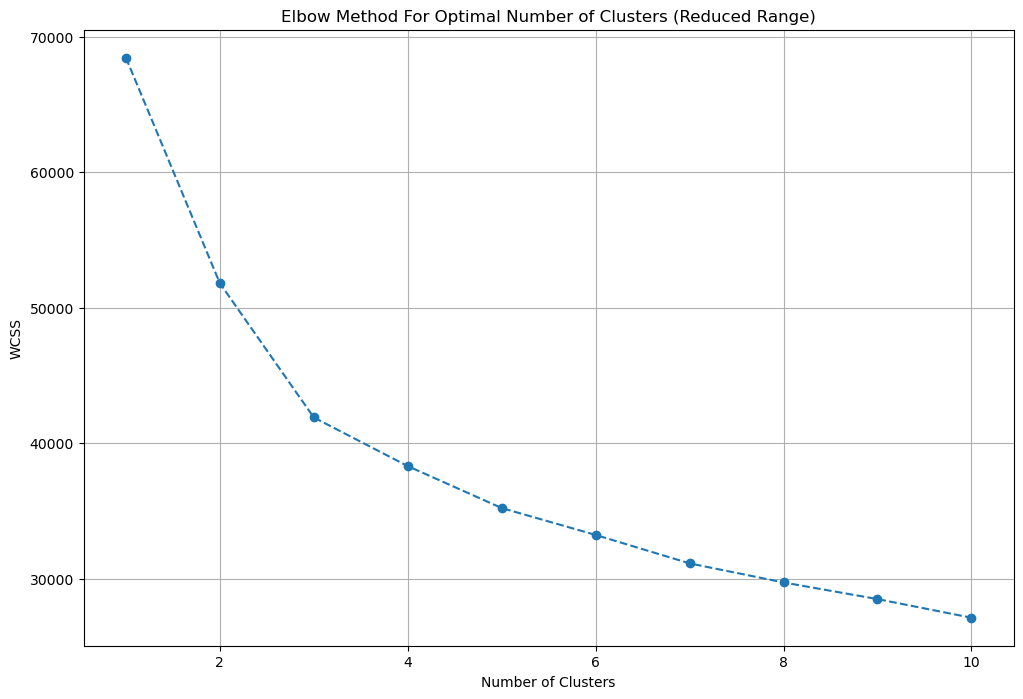

In [60]:
# importing some libraries

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

wcss_reduced = []

# applying k-means clustering
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)
    
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [61]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

df = df.iloc[:,:-18]
df['furnishing_type'] = cluster_assignments

df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

/Users/shaikfirdose/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,furnishDetails,furnishing_type
3410,"['1 Exhaust Fan', '7 Geyser', '1 Stove', '10 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
345,"['1 Water Purifier', '16 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '5 Geyser', '1 Stove', '25 Light', '1 Curtains', '1 Modular Kitchen', '1 Chimney', '5 TV', '10 AC', '5 Wardrobe', '5 Bed', '1 Sofa', '1 Washing Machine', 'No Microwave']",0
808,[],1
1204,"['1 Water Purifier', '6 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '13 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '4 Wardrobe', '1 Microwave', 'No Bed', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']",2
1022,"['3 Fan', '1 Exhaust Fan', '7 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1


# 5. features

In [62]:
df[['society','features']].sample(5)

,society,features
1590,orchid petals,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
186,ansals florence villa,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
404,microtek greenburg,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2679,godrej,"['Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1182,shree vardhman flora,"['Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center']"


In [63]:
df['features'].isnull().sum()

635

In [65]:
# now we will fetch ammenties for features nan column from apartments.csv file and use here

In [66]:
import pandas as pd

app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [67]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()
temp_df = df[df['features'].isnull()]
temp_df.shape

(635, 26)

In [68]:
# merging

x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']
df.loc[temp_df.index,'features'] = x.values
df['features'].isnull().sum()

481

In [72]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
913,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2191,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [73]:
features_binary_df.shape

(3803, 130)

/Users/shaikfirdose/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaikfirdose/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaikfirdose/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaikfirdose/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

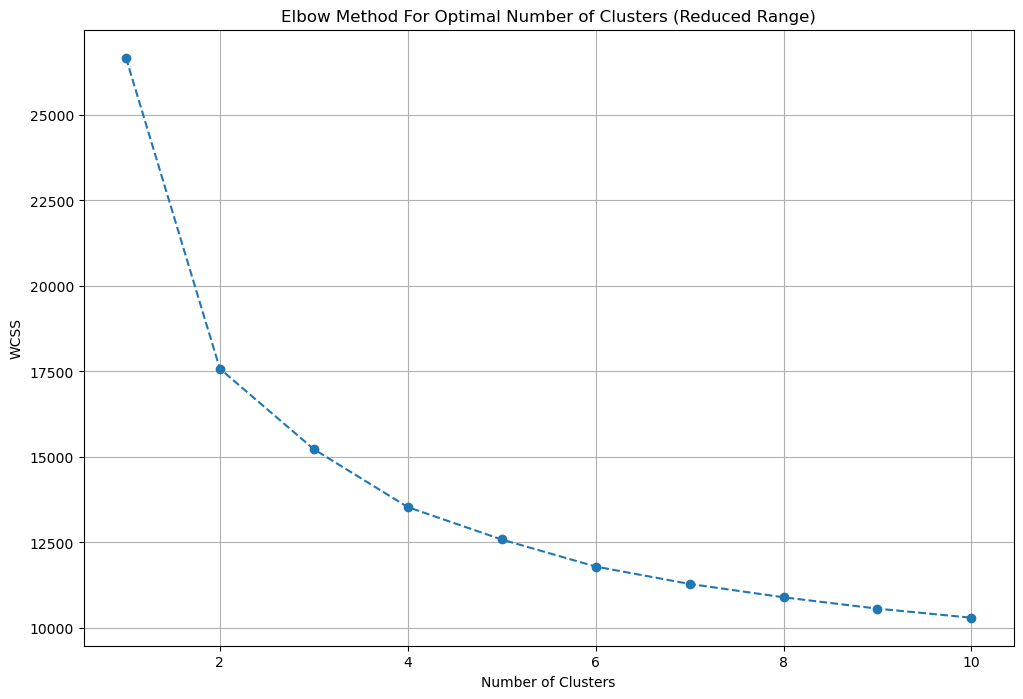

In [74]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)
    
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [75]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [76]:
df['luxury_score'] = luxury_score
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,experion the heartsong,sector 108,1.68,8387.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up area: 1338.29 sq.ft. (124.33 sq.m.)Carpet area: 986.41 sq.ft. (91.64 sq.m.),3,3,3+,"servant room,study room",4.0,East,Relatively New,"['Galleria 108 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'The Shikshiyan School', 'Manipal Hospital', 'Indira Gandhi International Airport', 'Vivanta New Delhi, Dwarka', 'SkyJumper Trampoline Park', 'Fun N Food Village']","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '1 Geyser', '7 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2003.0,1338.29,986.41,1,1,0,0,0,2,"[Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Visitor Parking, Swimming Pool, Park, Low Density Society, Shopping Centre, Fitness Centre / GYM, Rain Water Harvesting, Club house / Community Center, Water softening plant]",86
1,flat,emaar digihomes,sector 62,2.45,16000.0,1531.0,Built Up area: 1200 (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2,2,study room,7.0,North-East,New Property,"['Sector 55-56 Metro Station', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd Hwy,Sector 48', 'Heritage School', 'Lotus Valley Intl School, Gurgaon', 'Gurugram University', 'Sushant University', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Imperia Mindspace', 'AIPL Business Tower']","['1 Water Purifier', '2 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '1 Geyser', '1 Stove', '3 Light', '4 AC', '2 TV', '1 Modular Kitchen', '3 Chimney', '1 Curtains', '2 Wardrobe', '1 Sofa', '1 Washing Machine', 'No Bed', 'No Microwave']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,1200.00,1000.00,1,0,0,0,0,0,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",174
2,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850 sq.yards (2382.96 sq.m.)Carpet area: 2250 sq.yards (1881.29 sq.m.),8,7,3+,"pooja room,study room,serva

In [77]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
790,house,independent,sector 70a,2.10,35000.0,600.0,Carpet area: 600 (55.74 sq.m.),3,2,1,3.0,NaN,New Property,NaN,NaN,600.0,0,0,0,0,0,1,0
1599,house,independent,manesar,1.10,6172.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,1,0
1521,house,independent,sector 12,2.75,12343.0,2228.0,Built Up area: 2228 (206.99 sq.m.),6,6,2,2.0,NaN,Undefined,NaN,2228.0,NaN,0,0,0,0,0,1,0
2952,flat,dlf the ultima,sector 81,2.40,11257.0,2132.0,Super Built up area 2132(198.07 sq.m.)Built Up area: 1800 sq.ft. (167.23 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,2,10.0,North-West,Relatively New,2132.0,1800.0,1400.0,0,1,0,0,0,0,174
926,flat,raheja navodaya,sector 92,0.85,4271.0,1990.0,Super Built up area 1990(184.88 sq.m.),3,3,3,2.0,North-West,Relatively New,1990.0,NaN,NaN,0,0,0,0,0,1,100


In [78]:
df.shape

(3803, 23)

In [79]:
df.to_csv('indian_properties_cleaned_v2.csv', index=False)